In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

데이터 출처 : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [3]:
card_df = pd.read_csv("./data/creditcard.csv")
print('dataset shape:', card_df.shape)
card_df.head(3)

dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## 2.데이터 탐색하기

In [36]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3.데이터 전처리

In [4]:

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [5]:

def get_train_test_dataset(df=None):
  
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [7]:
X_train.shape, y_train.shape

((199364, 29), (199364,))

In [9]:
print(f'학습 데이터의 사기거래 비율 : {y_train.value_counts()/y_train.shape[0]*100}')
print(f'테스트 데이터의 사기거래 비율 : {y_test.value_counts()/y_test.shape[0]*100}')

학습 데이터의 사기거래 비율 : Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터의 사기거래 비율 : Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 로지스틱회귀, LGBM 모델 생성 후 비교하기

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   60    88]]
정확도: 0.9991, 정밀도: 0.8713, 재현율: 0.5946,    F1: 0.7068, AUC:0.9567


In [13]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

### LGBM 모델 만들기

In [14]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


<Axes: xlabel='Amount', ylabel='Count'>

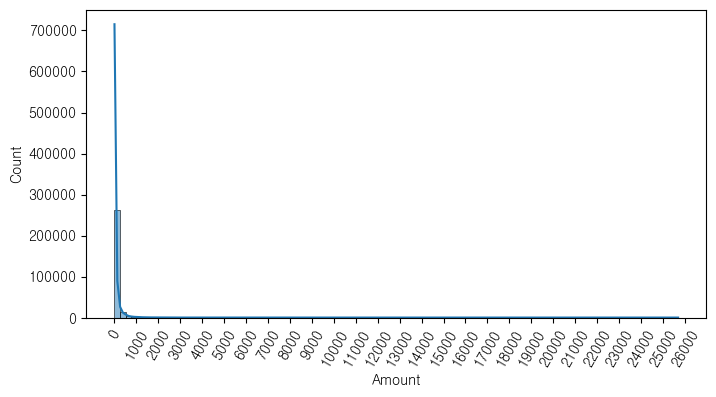

In [16]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)

In [23]:

from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    
    #Amount scaling
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0, 'Amount_scaled', amount_n)
    return df_copy
   

In [48]:
# 데이터 분할 > 로지스틱 회귀모델의 성능 비교
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df) 

print('< 로지스틱 회귀 예측 성능 >')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n< LightGBM 예측 성능 >')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

< 로지스틱 회귀 예측 성능 >
오차 행렬
[[85280    15]
 [   54    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6301,    F1: 0.7273, AUC:0.9555

< LightGBM 예측 성능 >
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9761


## 히트맵

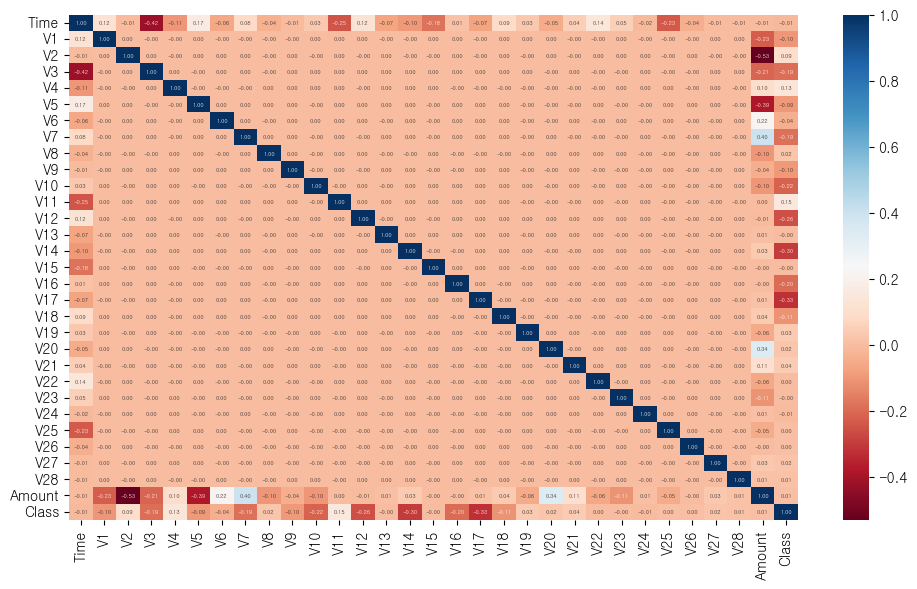

In [42]:
# 이상치 탐색
corr=card_df.corr()
sns.heatmap(card_df.corr(), cmap='RdBu', annot=True, annot_kws={"size":4}, fmt=".2f")
plt.Figure(figsize=(20,18))
plt.tight_layout()


In [53]:
corr = card_df.corr()['Class'].iloc[:-1]   # 마지막 Class 본인과의 상관 제외
print(corr.sort_values(ascending=True))

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Name: Class, dtype: float64


V14, V17 이 Class(타겟)과 음의 상관관계가 강하다. 아래 코드는 특정 피처의 아웃라이어 값을 찾는다.

In [28]:
def get_outlier(df=None, column=None, weight=1.5):

    fraud = df[df['Class']==1][column]

    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight #lower
    highest_val = quantile_75 + iqr_weight #upper
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [27]:
outlier_index = get_outlier(df = card_df, column='V14', weight=1.5)
outlier_index

Index([8296, 8615, 9035, 9252], dtype='int64')

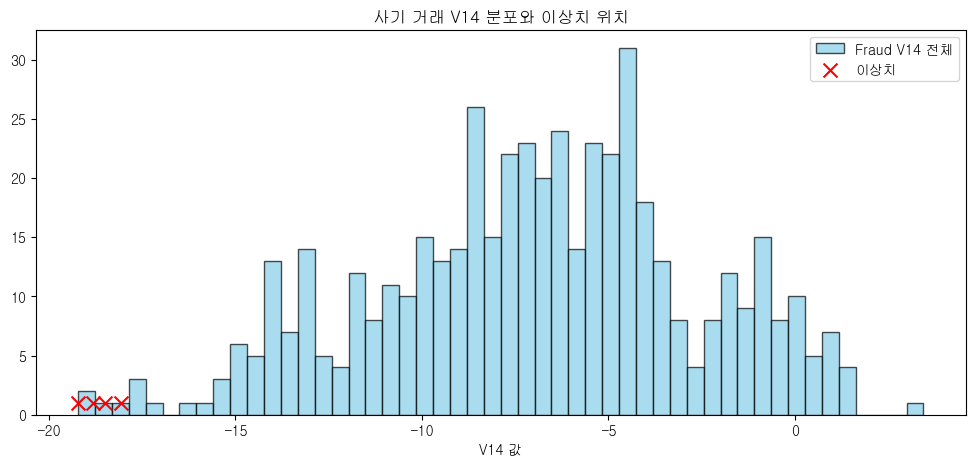

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(fraud_v14, bins=50, color='skyblue', label='Fraud V14 전체', alpha=0.7,edgecolor='black')
plt.scatter(outlier_values, [1]*len(outlier_values), color='red', label='이상치', s=100, marker='x')
plt.xlabel('V14 값')
plt.title('사기 거래 V14 분포와 이상치 위치')
plt.legend()
plt.show()

### v17 도 이상치 처리 하고 돌리기

In [60]:
print("V17 이상치 인덱스:", list(outlier_index))
print("이상치 개수:", len(outlier_index))

V17 이상치 인덱스: []
이상치 개수: 0


## 히트맵 도출 후 해석

1. 전체 카드 데이터(card_df)에서 사기 거래(Class=1) 중  
   V14 값이 극단적으로 크거나 작은 이상치로 판정된 샘플의 인덱스가  
   8296, 8615, 9035, 9252번 행이라는 것.  

2. 이 index들은 
'V14'에서 다른 사기거래 샘플들과 상당히 다른(비정상적으로 크거나 작은) 값을 가진 샘플이다.  
→ 분석, 모델링 전 이 데이터들을 따로 관리(제거·변환·조사)할 필요가 있다는 신호이다.  \

3. V17에서는 이상치가 없음

In [29]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    
    #Amount scaling
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(outlier_index, axis=0, inplace=True)  #이상치 제거
    return df_copy

### SMOTE로 오버샘플링하기

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
X_train.shape, X_train_over.shape

((199364, 30), (398040, 30))

In [61]:
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 세트: {X_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 학습용 피처/레이블 데이터 세트: {X_train_over.shape, y_train_over.shape}')
print(f'SMOTE 적용 후 레이블 값 분포: \n{pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ((199362, 30), (199362,))
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ((398040, 30), (398040,))
SMOTE 적용 후 레이블 값 분포: 
Class
0    199020
1    199020
Name: count, dtype: int64


### 모델 학습 및 예측 확률 구하기

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 모델 학습
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)

# 예측 확률 (양성 클래스의 확률)
y_scores = lr.predict_proba(X_test)[:, 1]

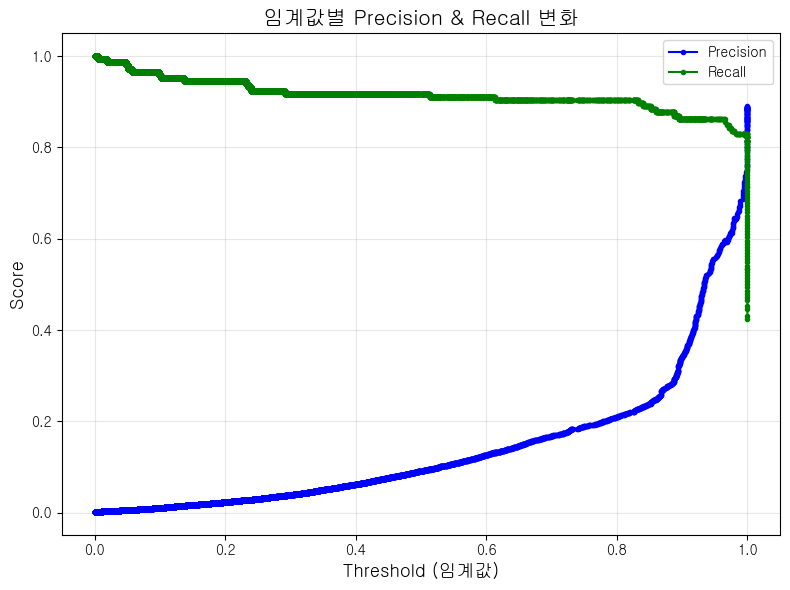

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. 모델 학습 (SMOTE 적용 후 데이터 사용)
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
y_scores = lr.predict_proba(X_test)[:, 1]

# 2. Precision, Recall, Threshold 계산
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# 3. 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b', marker='.')
plt.plot(thresholds, recall[:-1], label='Recall', color='g', marker='.')
plt.xlabel('Threshold (임계값)', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('임계값별 Precision & Recall 변화', fontsize=15)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
y_train_over.shape, y_train.shape

((398040,), (199364,))

In [33]:
y_train_over.value_counts()

Class
0    199020
1    199020
Name: count, dtype: int64